# JSON and CSV

Last week we talked about the the dictionary structure in Python.  How it can be used to collect data in key/value pairs.  These pairs can be quite valuable, particularly when you have many things to count.  So instead of having many separate accumulator structures, you can neatly store them all in a dictionary and let it automatically grow to hold more things as you are going over your content.

Now we're going to go through and try to discover looking at it in context along with how these can be used with CSVs.  

It is often the case that you are given a dataset in JSON format, but you need to get it into a CSV or rectangular format for analysis.  This is what you'll be doing for your homework, and we'll be walking through a few key points about each along the way.

In [1]:
import requests
import json
import time
from bs4 import BeautifulSoup
import statistics
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer

In [2]:


def create_search_url(term, offset):
    left = "https://en.wikipedia.org/w/api.php?action=query&list=search&srsearch="
    right = "&srwhat=text&srlimit=500&format=json"
    sanitize = "%20".join(term.split())
    offsetchunk = "&sroffset=" + str(offset) 
    return left + sanitize + right + offsetchunk

def get_pages(term):
    results = []
    offset = 0
    cont = True
    while cont:
        url = create_search_url(term, offset)
        print(url)
        r = requests.get(url)
        datadump = json.loads(r.text)

        if 'continue' in datadump:
            results.append(datadump['query']['search'])
            offset = datadump['continue']['sroffset']
            time.sleep(3)
        else:
            results.append(datadump['query']['search'])
            time.sleep(3)
            cont = False 
    return results
            
def get_clean_snippets(chunks):
    snippets = []

    for chunk in chunks:
        subset = [BeautifulSoup(d['snippet'], "lxml").text for d in chunk]
        snippets += subset
    
    return snippets

def get_sentiment_stats(snippets):
    senti = []

    for s in snippets:
        blob = TextBlob(s, analyzer = NaiveBayesAnalyzer())
        senti.append(blob.sentiment.polarity)
    
    return statistics.mean(senti), statistics.stdev(senti)

def write_results(pageresults, filename):
    j = []

    for chunk in pageresults:
        for d in chunk:
            j.append(d)

    with open(filename, 'w') as fout:
        json.dump(j, fout, indent=2)

In [7]:
pages = get_pages("luna lovegood")

https://en.wikipedia.org/w/api.php?action=query&list=search&srsearch=luna%20lovegood&srwhat=text&srlimit=500&format=json&sroffset=0


In [8]:
write_results(pages, 'lunalovegoodresults.json')

In [39]:
from textblob import TextBlob


senti = []

for s in snippets:
    blob = TextBlob(s)
    senti.append(blob.sentiment.polarity)
    

In [40]:
import statistics

In [41]:
print(statistics.stdev(senti))

0.17348486292583595


In [42]:
print(statistics.mean(senti))

0.05749786278147623


In [27]:
pitbull = get_clean_snippets(get_pages("husky"))

https://en.wikipedia.org/w/api.php?action=query&list=search&srsearch=husky&srwhat=text&srlimit=500&format=json&sroffset=0
https://en.wikipedia.org/w/api.php?action=query&list=search&srsearch=husky&srwhat=text&srlimit=500&format=json&sroffset=500
https://en.wikipedia.org/w/api.php?action=query&list=search&srsearch=husky&srwhat=text&srlimit=500&format=json&sroffset=1000
https://en.wikipedia.org/w/api.php?action=query&list=search&srsearch=husky&srwhat=text&srlimit=500&format=json&sroffset=1500
https://en.wikipedia.org/w/api.php?action=query&list=search&srsearch=husky&srwhat=text&srlimit=500&format=json&sroffset=2000
https://en.wikipedia.org/w/api.php?action=query&list=search&srsearch=husky&srwhat=text&srlimit=500&format=json&sroffset=2500
https://en.wikipedia.org/w/api.php?action=query&list=search&srsearch=husky&srwhat=text&srlimit=500&format=json&sroffset=3000
https://en.wikipedia.org/w/api.php?action=query&list=search&srsearch=husky&srwhat=text&srlimit=500&format=json&sroffset=3500
http

In [6]:
pbmean, pbsd = get_sentiment_stats(pitbull)

In [7]:
pbmean, pbsd

(0.04102543301852204, 0.20151453207703737)

In [8]:
corgi = get_clean_snippets(get_pages("corgi"))

https://en.wikipedia.org/w/api.php?action=query&list=search&srsearch=corgi&srwhat=text&srlimit=500&format=json&sroffset=0
https://en.wikipedia.org/w/api.php?action=query&list=search&srsearch=corgi&srwhat=text&srlimit=500&format=json&sroffset=500
https://en.wikipedia.org/w/api.php?action=query&list=search&srsearch=corgi&srwhat=text&srlimit=500&format=json&sroffset=1000


In [40]:
corgimean, corgisd = get_sentiment_stats(get_clean_snippets(pages))

AttributeError: 'Sentiment' object has no attribute 'polarity'

In [10]:
corgimean, corgisd

(0.06078057503015723, 0.22011338424180316)

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

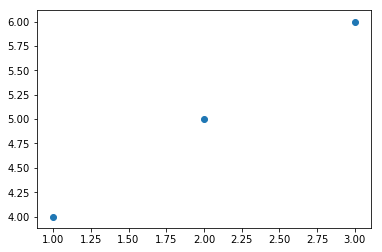

In [32]:
plt.scatter([1,2,3], [4,5,6])

In [45]:
senti = []

for s in get_clean_snippets(pages):
    blob = TextBlob(s, analyzer = NaiveBayesAnalyzer())
    pos = blob.sentiment.p_pos
    print(pos, blob)
    

0.9597758152302065 The Welsh Corgi, sometimes known as just a Corgi (/ˈkɔːrɡi/, Welsh for "dwarf dog"; plural "Corgis" or occasionally the etymologically consistent "Corgwn";
0.9960227037486132 The Pembroke Welsh Corgi (/ˈkɔːrɡi/; Welsh for "dwarf dog") is a cattle herding dog breed which originated in Pembrokeshire, Wales. It is one of two breeds


KeyboardInterrupt: 

In [29]:
senti[0]

[0.2748594612550001, 0.7251405387450001]

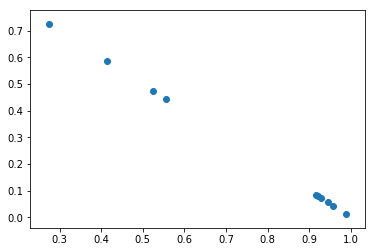

In [31]:
pos = [s[0] for s in senti]
neg = [s[1] for s in senti]

plt.scatter(pos, neg)

In [44]:
senti

[]

In [13]:
r = requests.get('https://en.wikipedia.org/w/api.php?action=query&list=search&srsearch=luna%20lovegood&srwhat=text&srlimit=500&format=json&sroffset=0')
datadump = json.loads(r.text)

In [18]:
with open('lunaresults.json','w') as out:
    json.dump(datadump, out, indent=4)